In [1]:
# query_list = ['./data/oxford5k_images/hertford_000056.jpg', './data/oxford5k_images/hertford_000056.jpg']

In [1]:
import os, sys, time
sys.path.append('../')
sys.path.append('../train')

from PIL import Image
from io import BytesIO
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from train.delf import Delf_V1
from feeder import Feeder
import matcher

def resize_image(image, target_size=800):
    def calc_by_ratio(a, b):
        return int(a * target_size / float(b))

    size = image.size
    if size[0] < size[1]:
        w = calc_by_ratio(size[0], size[1])
        h = target_size
    else:
        w = target_size
        h = calc_by_ratio(size[1], size[0])

    image = image.resize((w, h), Image.BILINEAR)
    return image


def get_and_cache_image(image_path, basewidth=None):
    image = Image.open(image_path)
    if basewidth is not None:
        image = resize_image(image, basewidth)
    imgByteArr = BytesIO()
    image.save(imgByteArr, format='PNG')
    imgByteArr = imgByteArr.getvalue()
    return image, imgByteArr


def get_result(feeder, query):
    pil_image = []
    byte_image = []
    for _, v in enumerate(query):
        pil, byte = get_and_cache_image(v)
        pil_image.append(pil)
        byte_image.append(byte)

    # feed and get output.
    outputs = feeder.feed_to_compare(query, pil_image)
    print('# of extracted feature (qeuery):', len(outputs[0]['descriptor_np_list']))
    print('# of extracted feature (db):', len(outputs[0]['descriptor_np_list']))
    
    att1 = matcher.get_attention_image_byte(outputs[0]['attention_np_list'])
    att2 = matcher.get_attention_image_byte(outputs[1]['attention_np_list'])

    side_by_side_comp_img_byte, score = matcher.get_ransac_image_byte(
        byte_image[0],
        outputs[0]['location_np_list'],
        outputs[0]['descriptor_np_list'],
        byte_image[1],
        outputs[1]['location_np_list'],
        outputs[1]['descriptor_np_list'])
    print('matching inliner num:', score)
    return side_by_side_comp_img_byte, att1, att2



/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/delf/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
from matplotlib.pyplot import imshow

feeder_config = {
    'GPU_ID': 3,
    'IOU_THRES': 0.98,
    'ATTN_THRES': 0.37,
    'TARGET_LAYER': 'layer3',
    'TOP_K': 1000,
    #'PCA_PARAMETERS_PATH':'./output/pca/banknote_v3_hana_balanced/pca.h5',
    'PCA_PARAMETERS_PATH':'./output/pca/ldmk/pca.h5',
    #'PCA_PARAMETERS_PATH':'./output/pca/glr2k/pca.h5',
    'PCA_DIMS':40,
    'USE_PCA': False,
    'SCALE_LIST': [0.25, 0.3535, 0.5, 0.7071, 1.0, 1.4147, 2.0],
    
    #'LOAD_FROM': '../train/repo/banknote_v3_balanced_hana_alt/keypoint/ckpt/fix.pth.tar',
    #'LOAD_FROM': '../train/repo/ldmk/keypoint/ckpt/fix.pth.tar',
    'LOAD_FROM': '../train/repo/glr2k_alt/keypoint/ckpt/fix.pth.tar',
    'ARCH': 'resnet50',
    'EXPR': 'dummy',
    'TARGET_LAYER': 'layer3',
}
myfeeder = Feeder(feeder_config)



load DeLF pytorch model...
{'arch': 'resnet50', 'expr': 'dummy', 'load_from': '../train/repo/glr2k_alt/keypoint/ckpt/fix.pth.tar', 'ncls': 'dummy', 'stage': 'inference', 'target_layer': 'layer3', 'use_random_gamma_rescale': False}
[inference] loading resnet50 pretrained ImageNet weights ... It may take few seconds...
deep copied weights from layer "conv1" ...
deep copied weights from layer "bn1" ...
deep copied weights from layer "relu" ...
deep copied weights from layer "maxpool" ...
deep copied weights from layer "layer1" ...
deep copied weights from layer "layer2" ...
deep copied weights from layer "layer3" ...
loaded weights from module "base" ...
loaded weights from module "attn" ...
loaded weights from module "pool" ...
load model from "../train/repo/glr2k_alt/keypoint/ckpt/fix.pth.tar"
load PCA parameters...


In [3]:

'''
###### DB_CNY_1.JPG
# test 1
prefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/delf/extract/debug/banknote/'
query = [prefix + 'query/CNY1.jpg', prefix + 'db/DB_CNY_1.JPG']
result_image_byte, att1, att2 = get_result(myfeeder, query)
plt.figure(figsize=(16,12))
result_image = Image.open(BytesIO(result_image_byte))
imshow(np.asarray(result_image), aspect='auto')
plt.figure(figsize=(4,3))
att1_image = Image.open(BytesIO(att1))
imshow(np.asarray(att1_image), aspect='auto')
plt.figure(figsize=(4,3))
att2_image = Image.open(BytesIO(att2))
imshow(np.asarray(att2_image), aspect='auto')

# test 2
prefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/delf/extract/debug/banknote/'
query = [prefix + 'query/CNY2.jpg', prefix + 'db/DB_CNY_1.JPG']
result_image_byte, att1, att2 = get_result(myfeeder, query)
plt.figure(figsize=(16,12))
result_image = Image.open(BytesIO(result_image_byte))
imshow(np.asarray(result_image), aspect='auto')
plt.figure(figsize=(4,3))
att1_image = Image.open(BytesIO(att1))
imshow(np.asarray(att1_image), aspect='auto')
plt.figure(figsize=(4,3))
att2_image = Image.open(BytesIO(att2))
imshow(np.asarray(att2_image), aspect='auto')

# test 3
prefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/delf/extract/debug/banknote/'
query = [prefix + 'query/CNY3.jpg', prefix + 'db/DB_CNY_1.JPG']
result_image_byte, att1, att2 = get_result(myfeeder, query)
plt.figure(figsize=(16,12))
result_image = Image.open(BytesIO(result_image_byte))
imshow(np.asarray(result_image), aspect='auto')
plt.figure(figsize=(4,3))
att1_image = Image.open(BytesIO(att1))
imshow(np.asarray(att1_image), aspect='auto')
plt.figure(figsize=(4,3))
att2_image = Image.open(BytesIO(att2))
imshow(np.asarray(att2_image), aspect='auto')

###### DB_CNY_2.JPG
# test 1
prefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/delf/extract/debug/banknote/'
query = [prefix + 'query/CNY1.jpg', prefix + 'db/DB_CNY_2.JPG']
result_image_byte, att1, att2 = get_result(myfeeder, query)
plt.figure(figsize=(16,12))
result_image = Image.open(BytesIO(result_image_byte))
imshow(np.asarray(result_image), aspect='auto')
plt.figure(figsize=(4,3))
att1_image = Image.open(BytesIO(att1))
imshow(np.asarray(att1_image), aspect='auto')
plt.figure(figsize=(4,3))
att2_image = Image.open(BytesIO(att2))
imshow(np.asarray(att2_image), aspect='auto')

# test 2
prefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/delf/extract/debug/banknote/'
query = [prefix + 'query/CNY2.jpg', prefix + 'db/DB_CNY_2.JPG']
result_image_byte, att1, att2 = get_result(myfeeder, query)
plt.figure(figsize=(16,12))
result_image = Image.open(BytesIO(result_image_byte))
imshow(np.asarray(result_image), aspect='auto')
plt.figure(figsize=(4,3))
att1_image = Image.open(BytesIO(att1))
imshow(np.asarray(att1_image), aspect='auto')
plt.figure(figsize=(4,3))
att2_image = Image.open(BytesIO(att2))
imshow(np.asarray(att2_image), aspect='auto')

# test 3
prefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/delf/extract/debug/banknote/'
query = [prefix + 'query/CNY3.jpg', prefix + 'db/DB_CNY_2.JPG']
result_image_byte, att1, att2 = get_result(myfeeder, query)
plt.figure(figsize=(16,12))
result_image = Image.open(BytesIO(result_image_byte))
imshow(np.asarray(result_image), aspect='auto')
plt.figure(figsize=(4,3))
att1_image = Image.open(BytesIO(att1))
imshow(np.asarray(att1_image), aspect='auto')
plt.figure(figsize=(4,3))
att2_image = Image.open(BytesIO(att2))
imshow(np.asarray(att2_image), aspect='auto')
'''

"\n###### DB_CNY_1.JPG\n# test 1\nprefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/delf/extract/debug/banknote/'\nquery = [prefix + 'query/CNY1.jpg', prefix + 'db/DB_CNY_1.JPG']\nresult_image_byte, att1, att2 = get_result(myfeeder, query)\nplt.figure(figsize=(16,12))\nresult_image = Image.open(BytesIO(result_image_byte))\nimshow(np.asarray(result_image), aspect='auto')\nplt.figure(figsize=(4,3))\natt1_image = Image.open(BytesIO(att1))\nimshow(np.asarray(att1_image), aspect='auto')\nplt.figure(figsize=(4,3))\natt2_image = Image.open(BytesIO(att2))\nimshow(np.asarray(att2_image), aspect='auto')\n\n# test 2\nprefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/delf/extract/debug/banknote/'\nquery = [prefix + 'query/CNY2.jpg', prefix + 'db/DB_CNY_1.JPG']\nresult_image_byte, att1, att2 = get_result(myfeeder, query)\nplt.figure(figsize=(16,12))\nresult_image = Image.open(BytesIO(result_image_byte))\nimshow(np.asarray(result_image), aspect='auto

# of extracted feature (qeuery): 1000
# of extracted feature (db): 1000
attn_score shape: (1, 1, 28, 32)
attn_score shape: (1, 1, 48, 64)
matching inliner num: 375
# of extracted feature (qeuery): 1000
# of extracted feature (db): 1000
attn_score shape: (1, 1, 28, 32)
attn_score shape: (1, 1, 48, 64)
matching inliner num: 80
# of extracted feature (qeuery): 1000
# of extracted feature (db): 1000
attn_score shape: (1, 1, 28, 32)
attn_score shape: (1, 1, 48, 64)


/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/delf/venv/lib/python3.6/site-packages/skimage/transform/_geometric.py:684: RuntimeWarning: divide by zero encountered in true_divide
  H.flat[list(self._coeffs) + [8]] = - V[-1, :-1] / V[-1, -1]
/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/delf/venv/lib/python3.6/site-packages/skimage/measure/fit.py:931: RuntimeWarning: invalid value encountered in less
  sample_model_inliers = sample_model_residuals < residual_threshold


matching inliner num: 31
# of extracted feature (qeuery): 1000
# of extracted feature (db): 1000
attn_score shape: (1, 1, 28, 32)
attn_score shape: (1, 1, 43, 64)
matching inliner num: 60
# of extracted feature (qeuery): 1000
# of extracted feature (db): 1000
attn_score shape: (1, 1, 28, 32)
attn_score shape: (1, 1, 48, 64)
matching inliner num: 56


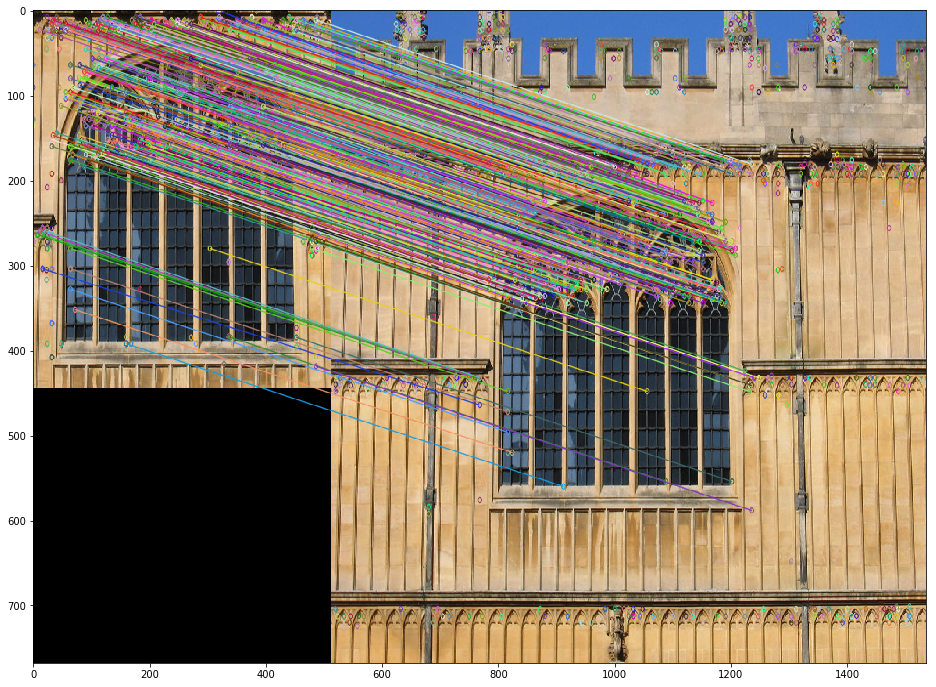

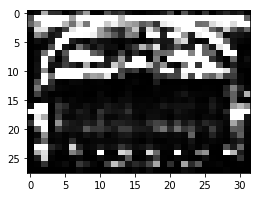

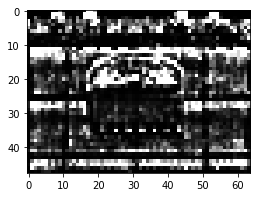

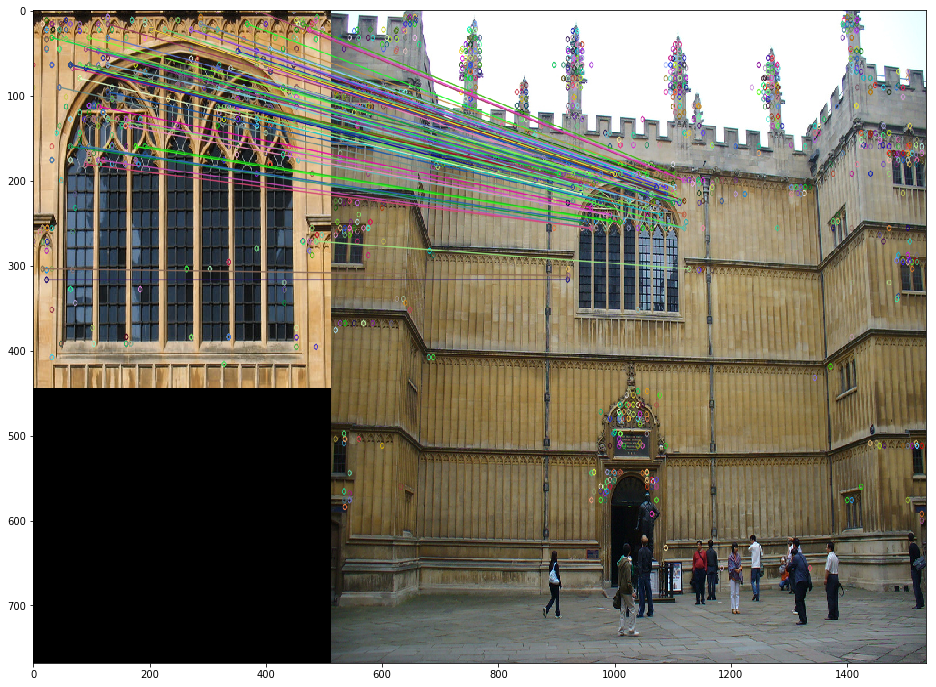

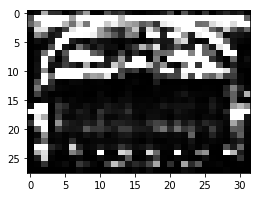

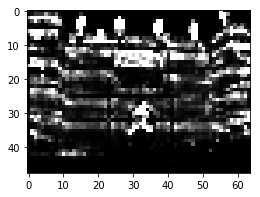

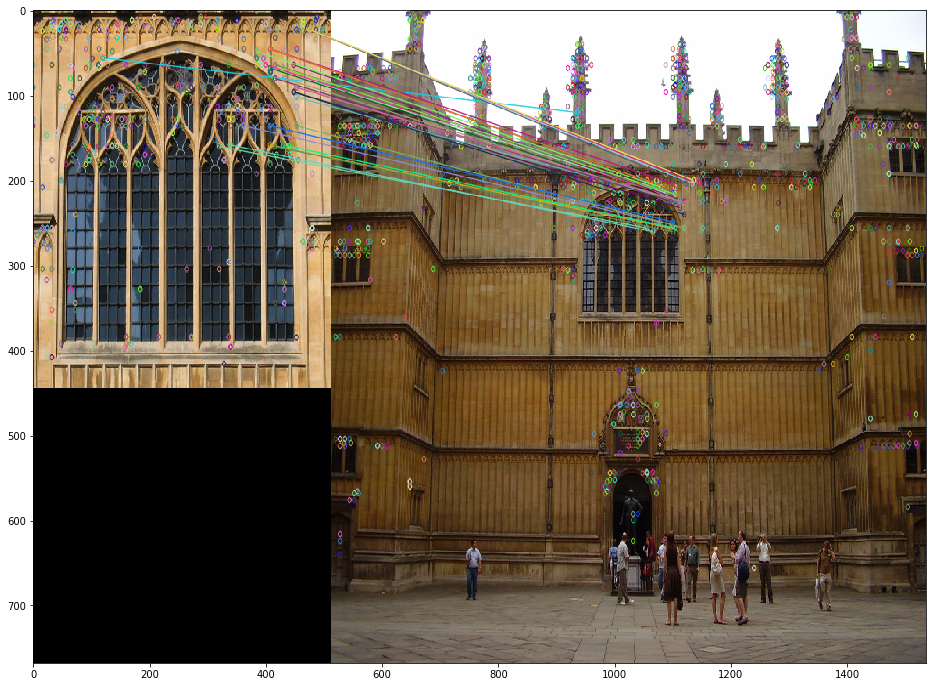

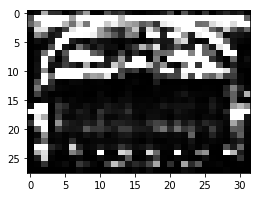

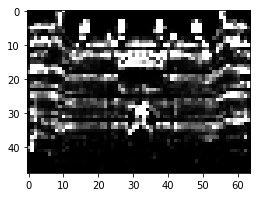

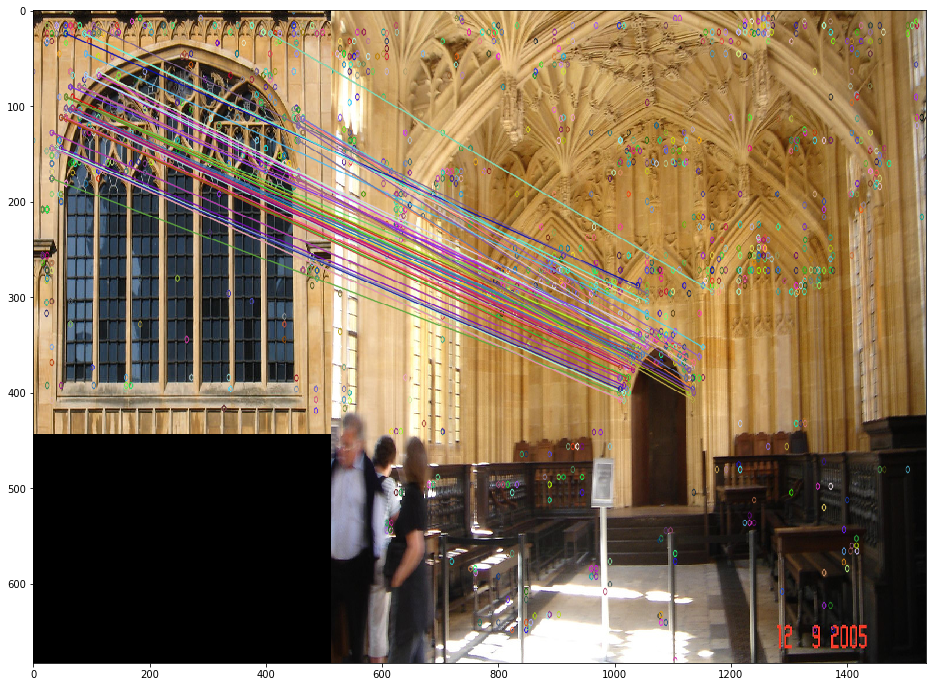

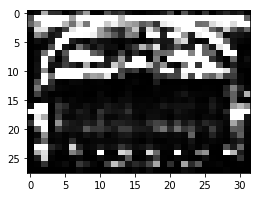

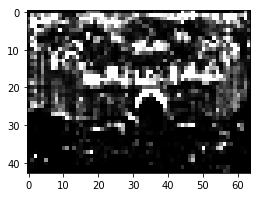

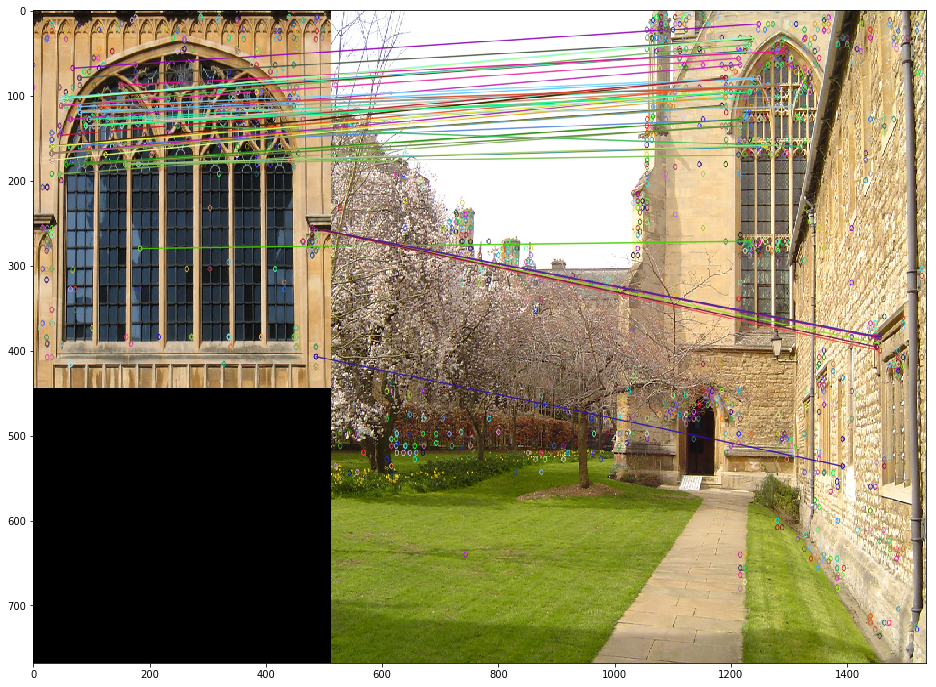

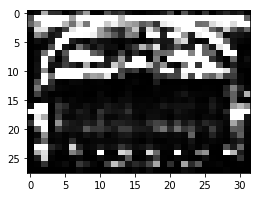

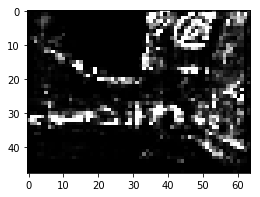

In [4]:

###### bodleian_1.png
# test 1 (1st result with tf code.)
prefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/data/oxf5k/'
query = [prefix + 'query/images/bodleian_1.png', prefix + 'db/images/bodleian_000107.jpg']
result_image_byte, att1, att2 = get_result(myfeeder, query)
plt.figure(figsize=(16,12))
result_image = Image.open(BytesIO(result_image_byte))
imshow(np.asarray(result_image), aspect='auto')
plt.figure(figsize=(4,3))
att1_image = Image.open(BytesIO(att1))
imshow(np.asarray(att1_image), aspect='auto')
plt.figure(figsize=(4,3))
att2_image = Image.open(BytesIO(att2))
imshow(np.asarray(att2_image), aspect='auto')

# test 2 (2nd result with tf code.)
prefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/data/oxf5k/'
query = [prefix + 'query/images/bodleian_1.png', prefix + 'db/images/bodleian_000364.jpg']
result_image_byte, att1, att2 = get_result(myfeeder, query)
plt.figure(figsize=(16,12))
result_image = Image.open(BytesIO(result_image_byte))
imshow(np.asarray(result_image), aspect='auto')
plt.figure(figsize=(4,3))
att1_image = Image.open(BytesIO(att1))
imshow(np.asarray(att1_image), aspect='auto')
plt.figure(figsize=(4,3))
att2_image = Image.open(BytesIO(att2))
imshow(np.asarray(att2_image), aspect='auto')

# test 3(3rd result with tf code.)
prefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/data/oxf5k/'
query = [prefix + 'query/images/bodleian_1.png', prefix + 'db/images/bodleian_000077.jpg']
result_image_byte, att1, att2 = get_result(myfeeder, query)
plt.figure(figsize=(16,12))
result_image = Image.open(BytesIO(result_image_byte))
imshow(np.asarray(result_image), aspect='auto')
plt.figure(figsize=(4,3))
att1_image = Image.open(BytesIO(att1))
imshow(np.asarray(att1_image), aspect='auto')
plt.figure(figsize=(4,3))
att2_image = Image.open(BytesIO(att2))
imshow(np.asarray(att2_image), aspect='auto')

# test 4(1st result with pytorch code.)
prefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/data/oxf5k/'
query = [prefix + 'query/images/bodleian_1.png', prefix + 'db/images/oxford_001693.jpg']
result_image_byte, att1, att2 = get_result(myfeeder, query)
plt.figure(figsize=(16,12))
result_image = Image.open(BytesIO(result_image_byte))
imshow(np.asarray(result_image), aspect='auto')
plt.figure(figsize=(4,3))
att1_image = Image.open(BytesIO(att1))
imshow(np.asarray(att1_image), aspect='auto')
plt.figure(figsize=(4,3))
att2_image = Image.open(BytesIO(att2))
imshow(np.asarray(att2_image), aspect='auto')

# test 5(2nd result with pytorch code.)
prefix = '/home1/irteam/nashory/workspace/kaggle/google-landmark-challenge/data/oxf5k/'
query = [prefix + 'query/images/bodleian_1.png', prefix + 'db/images/oxford_000743.jpg']
result_image_byte, att1, att2 = get_result(myfeeder, query)
plt.figure(figsize=(16,12))
result_image = Image.open(BytesIO(result_image_byte))
imshow(np.asarray(result_image), aspect='auto')
plt.figure(figsize=(4,3))
att1_image = Image.open(BytesIO(att1))
imshow(np.asarray(att1_image), aspect='auto')
plt.figure(figsize=(4,3))
att2_image = Image.open(BytesIO(att2))
imshow(np.asarray(att2_image), aspect='auto')
